In [1]:
#import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data
#dataset=pd.read_csv('/content/drive/My Drive/Ml/Db/Unemployment_in_India.csv')

In [4]:
# Load another Csv file
dataset=pd.read_csv('/content/drive/My Drive/Ml/Db/Unemployment_Rate_upto_11_2020.csv')

In [5]:
#copy of original dataset
df=dataset.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
# Check if null values are present
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
# Check if Duplicated Value Present
df.duplicated().sum()

0

In [10]:
# Shape of dataframe
df.shape

(267, 9)

Text(0.5, 1.0, 'Region and unemployment count')

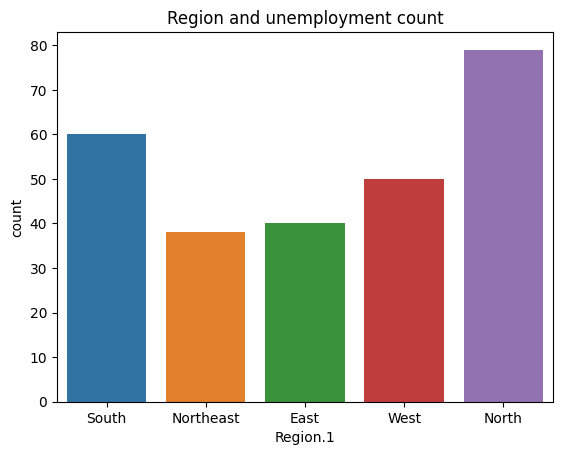

In [11]:
# region of country and their unemployment rate.
sns.countplot(x=df['Region.1'])
plt.title('Region and unemployment count')

In [12]:
df[' Frequency'].value_counts()

 M    267
Name:  Frequency, dtype: int64

In [13]:
# As Frequency Column all rows contain M so there is no use of it so we can drop it
df.drop(' Frequency',axis=1,inplace=True)

In [14]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

**In Above columns the frequency column is not presented .**

In [15]:
#Convert Date from Object to date time
df[' Date']=pd.to_datetime(df[' Date']).dt.date

In [16]:
# check the type of Date column
df[' Date'].dtype

dtype('O')

In [17]:
#check region wise count
df['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [18]:
numerical_var=df[[' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'longitude', 'latitude']]

<Axes: >

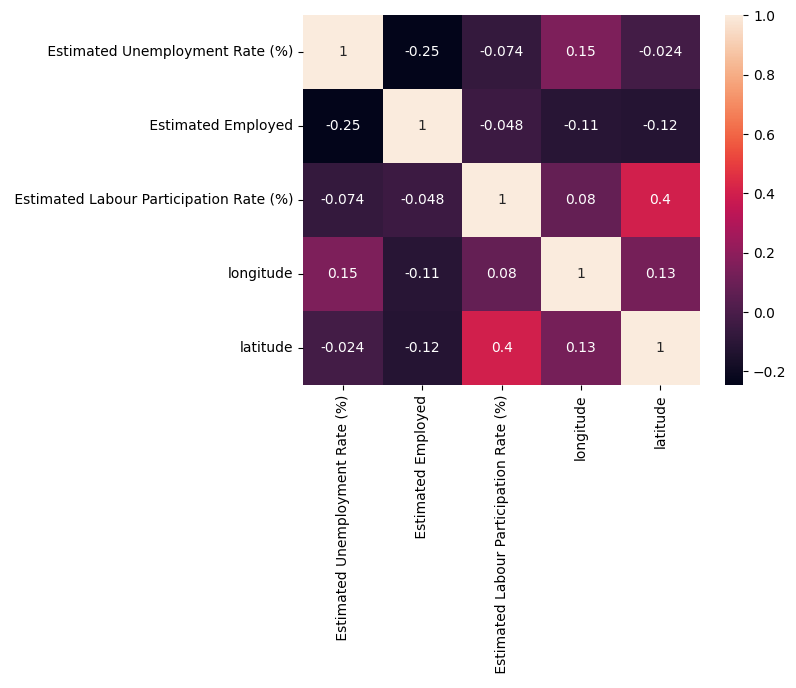

In [19]:
heatmap=numerical_var.corr()
sns.heatmap(heatmap,annot=True)

**As in this heatmap there are no correlated features found for multicollinearity problem**

Text(0.5, 1.0, 'Region wise Estimated Unemployment Rate')

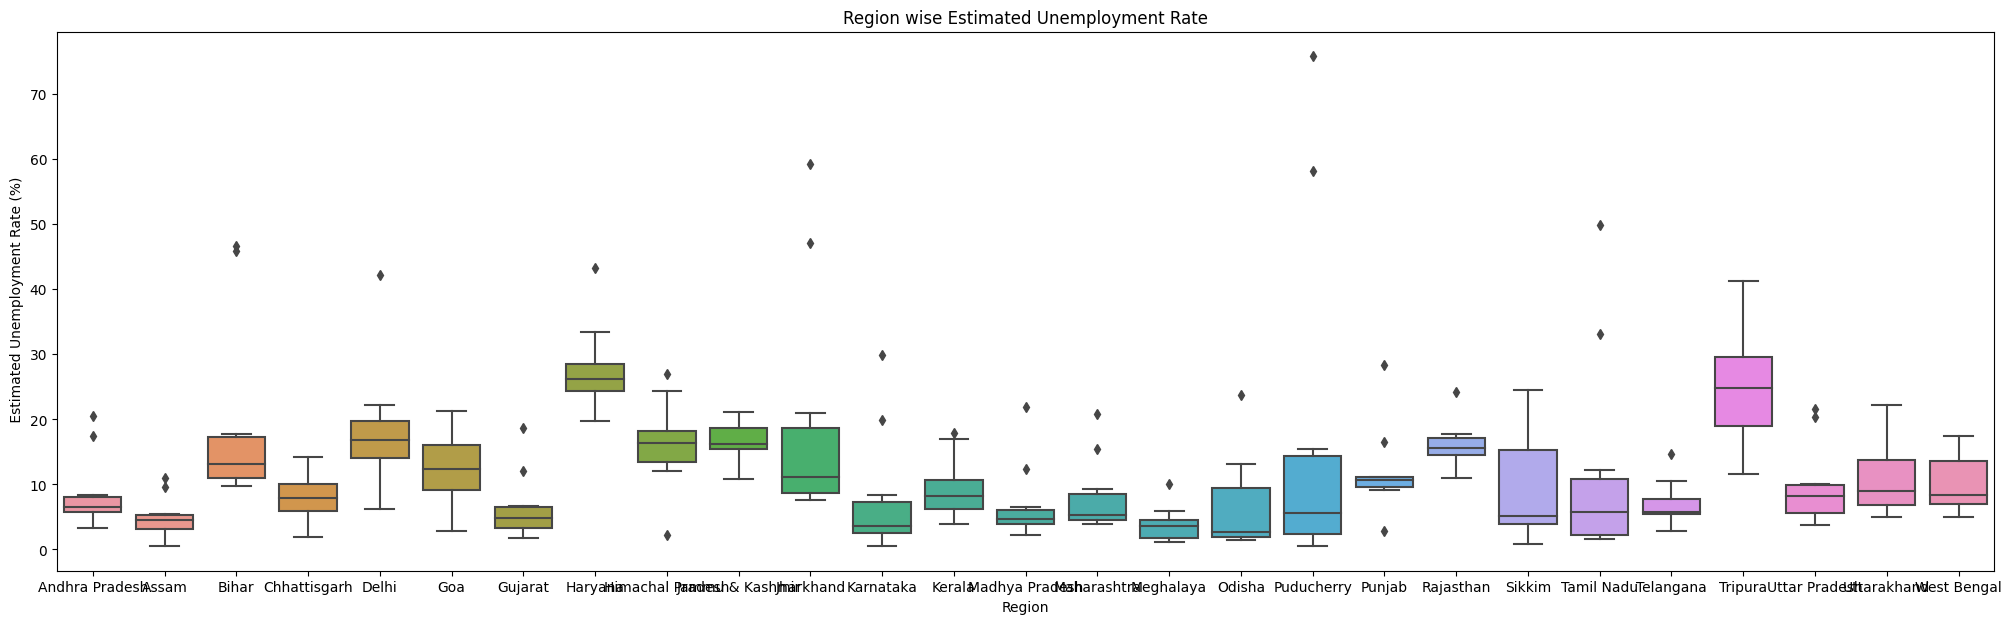

In [20]:
plt.figure(figsize=(25,7))
sns.boxplot(x=df['Region'],y=df[' Estimated Unemployment Rate (%)'])
plt.title('Region wise Estimated Unemployment Rate')


**Almost all region contain 10 except jammue & kashmir and Sikkim**

In [21]:
# Plot hostogram to display regionwise unemployment rate
fg = px.histogram(df,x='Region.1',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame=' Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [22]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


Text(0.5, 1.0, 'Region and their Estimated Labour Participation')

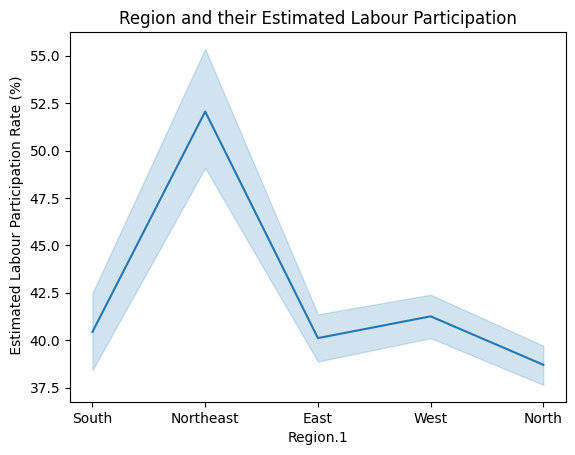

In [23]:
# Region and their Estimated Labour Participation
sns.lineplot(x=df['Region.1'],y=df[' Estimated Labour Participation Rate (%)'])
plt.title('Region and their Estimated Labour Participation')

**From graph we can say that Northeast region has high Estimated Labour Participitation.**

In [24]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="Region", size=" Estimated Unemployment Rate (%)",
                     scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()